## Analyze A/B Test Results

This project will assure you have mastered the subjects covered in the statistics lessons.  The hope is to have this project be as comprehensive of these topics as possible.  Good luck!

## Table of Contents
- [Introduction](#intro)
- [Part I - Probability](#probability)
- [Part II - A/B Test](#ab_test)
- [Part III - Regression](#regression)


<a id='intro'></a>
### Introduction

A/B tests are very commonly performed by data analysts and data scientists.  It is important that you get some practice working with the difficulties of these 

For this project, you will be working to understand the results of an A/B test run by an e-commerce website.  Your goal is to work through this notebook to help the company understand if they should implement the new page, keep the old page, or perhaps run the experiment longer to make their decision.

**As you work through this notebook, follow along in the classroom and answer the corresponding quiz questions associated with each question.** The labels for each classroom concept are provided for each question.  This will assure you are on the right track as you work through the project, and you can feel more confident in your final submission meeting the criteria.  As a final check, assure you meet all the criteria on the [RUBRIC](https://review.udacity.com/#!/projects/37e27304-ad47-4eb0-a1ab-8c12f60e43d0/rubric).

<a id='probability'></a>
#### Part I - Probability

To get started, let's import our libraries.

In [1]:
#Importing the necessary libraries for inital analysis and visualization

import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
%matplotlib inline

#We are setting the seed to assure you get the same answers on quizzes as we set up
random.seed(42)

`1.` Now, read in the `ab_data.csv` data. Store it in `df`.  **Use your dataframe to answer the questions in Quiz 1 of the classroom.**

a. Read in the dataset and take a look at the top few rows here:

In [2]:
# Reading the data into a DataFrame and reviewing the first few lines

df = pd.read_csv('ab_data.csv')
df.head()

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1


b. Use the below cell to find the number of rows in the dataset.

In [3]:
# Showing the number of rows in the dataset

df.shape[0]

294478

c. The number of unique users in the dataset.

In [4]:
# Number of unique users in the dataset

df.user_id.nunique()

290584

d. The proportion of users converted.

In [5]:
# Proportions of users who converted

df.converted.mean()

0.11965919355605512

e. The number of times the `new_page` and `treatment` don't line up.

In [6]:
# Number of people in the treatment group who did not get the new_page

df.query("group == 'treatment' & landing_page != 'new_page'").landing_page.count()

1965

$e_{extra}$ The number of times `old_page` and `control` don't line up.

In [7]:
# Number of people in the control group who got the new_page

df.query("group == 'control' & landing_page != 'old_page'").landing_page.count()

1928

**Frequency table of group vs. landing page columns in the original DataFrame.**

In [8]:
# Frequency table showing the number of people in each group vs page received

pd.crosstab(df.group, df.landing_page)

landing_page,new_page,old_page
group,,
control,1928,145274
treatment,145311,1965


f. Do any of the rows have missing values?

In [9]:
# Number of missing values in the dataset

df.isna().sum().sum()

0

**There are no missing values in any of the columns.**

`2.` For the rows where **treatment** is not aligned with **new_page** or **control** is not aligned with **old_page**, we cannot be sure if this row truly received the new or old page.  Use **Quiz 2** in the classroom to provide how we should handle these rows.  

a. Now use the answer to the quiz to create a new dataset that meets the specifications from the quiz.  Store your new dataframe in **df2**.

In [10]:
# Creating a new DataFrame, where users in the control group all receive the old page
# and users in the treatment group all receive the new page

df2 = df.query("(group == 'control' & landing_page == 'old_page') \
or (group == 'treatment' & landing_page == 'new_page')").copy()

In [11]:
# Double Check all of the correct rows were removed - this should be 0

df2[((df2['group'] == 'treatment') == (df2['landing_page'] == 'new_page')) == False].shape[0]

0

**Frequency table of group vs. landing page columns in the *df2*.**

In [12]:
# Frequency table to check number of users by group and page type

pd.crosstab(df2.group, df2.landing_page)

landing_page,new_page,old_page
group,,
control,0,145274
treatment,145311,0


`3.` Use **df2** and the cells below to answer questions for **Quiz3** in the classroom.

a. How many unique **user_id**s are in **df2**?

In [13]:
# Number of unique user IDs

df2.user_id.nunique()

290584

b. There is one **user_id** repeated in **df2**.  What is it?

In [14]:
# Locating the repeated user ID

df2.loc[df2.user_id.duplicated()].user_id

2893    773192
Name: user_id, dtype: int64

c. What is the row information for the repeat **user_id**? 

In [15]:
# Displaying row information for the repeat user ID (both entries)

df2.loc[df2.user_id.duplicated(keep=False), :]

,user_id,timestamp,group,landing_page,converted
1899,773192,2017-01-09 05:37:58.781806,treatment,new_page,0
2893,773192,2017-01-14 02:55:59.590927,treatment,new_page,0


d. Remove **one** of the rows with a duplicate **user_id**, but keep your dataframe as **df2**.

In [16]:
# Checking no. of rows before removal

print('Number of rows before removing the duplicate user ID:' ,df2.shape[0])

# Removing the duplicate while keeping the DataFrame as df2

df2.drop(2893, inplace=True)

# Checking no. of rows after removal

print('Number of rows after removing the duplicate user ID:', df2.shape[0])

Number of rows before removing the duplicate user ID: 290585
Number of rows after removing the duplicate user ID: 290584


`4.` Use **df2** in the below cells to answer the quiz questions related to **Quiz 4** in the classroom.

a. What is the probability of an individual converting regardless of the page they receive?

In [17]:
# Probability of an individual converting regardless of the page they receive

p_population = df.converted.mean()
p_population

0.11965919355605512

b. Given that an individual was in the `control` group, what is the probability they converted?

In [18]:
# Probability of converting given an individual was in the control group

p_control = df2.query("group == 'control'").converted.mean()
p_control

0.1203863045004612

c. Given that an individual was in the `treatment` group, what is the probability they converted?

In [19]:
# Probability a converting give an individual was in the treatment group

p_treatment = df2.query("group == 'treatment'").converted.mean()
p_treatment

0.11880806551510564

In [20]:
# The actual difference (obs_diff) between the conversion rates for the two groups.

obs_diff = p_treatment - p_control
obs_diff

-0.0015782389853555567

d. What is the probability that an individual received the new page?

In [21]:
# Probability an individual received the new page (percentage of users with the new page)

df2.query("landing_page == 'new_page'").shape[0] / df2.shape[0]

0.5000619442226688

e. Consider your results from a. through d. above, and explain below whether you think there is sufficient evidence to say that the new treatment page leads to more conversions.

**The population was split into two equal-sized groups: control and treatment. The conversion probability of the control group was 12.04%, whereas the therapy group was 11.88%.**

**Based on these statistics, users who were migrated from the old control page to the new treatment page observed a 0.16% decline in conversion rate.**

**Consequently, no evidence exists that the redesigned treatment page increased conversion.**

<a id='ab_test'></a>
### Part II - A/B Test

Notice that because of the time stamp associated with each event, you could technically run a hypothesis test continuously as each observation was observed.  

However, then the hard question is do you stop as soon as one page is considered significantly better than another or does it need to happen consistently for a certain amount of time?  How long do you run to render a decision that neither page is better than another?  

These questions are the difficult parts associated with A/B tests in general.  


`1.` For now, consider you need to make the decision just based on all the data provided.  If you want to assume that the old page is better unless the new page proves to be definitely better at a Type I error rate of 5%, what should your null and alternative hypotheses be?  You can state your hypothesis in terms of words or in terms of **$p_{old}$** and **$p_{new}$**, which are the converted rates for the old and new pages.

$$
\large
H_{0}: p_{old} \ge p_{new}\\
\large
H_{1}: p_{old} < p_{new}
$$

`2.` Assume under the null hypothesis, $p_{new}$ and $p_{old}$ both have "true" success rates equal to the **converted** success rate regardless of page - that is $p_{new}$ and $p_{old}$ are equal. Furthermore, assume they are equal to the **converted** rate in **ab_data.csv** regardless of the page. <br><br>

Use a sample size for each page equal to the ones in **ab_data.csv**.  <br><br>

Perform the sampling distribution for the difference in **converted** between the two pages over 10,000 iterations of calculating an estimate from the null.  <br><br>

Use the cells below to provide the necessary parts of this simulation.  If this doesn't make complete sense right now, don't worry - you are going to work through the problems below to complete this problem.  You can use **Quiz 5** in the classroom to make sure you are on the right track.<br><br>

a. What is the **convert rate** for $p_{new}$ under the null? 

In [22]:
# Convert rate for users who received the new page under the null hypothesis

p_new = df2.converted.mean()
p_new

0.11959708724499628

b. What is the **convert rate** for $p_{old}$ under the null? <br><br>

In [23]:
# Convert rate for users who received the old page under the null hypothesis

p_old = df2.converted.mean()
p_old

0.11959708724499628

c. What is $n_{new}$?

In [24]:
# Number of users who received the new page in the new dataset

n_new = df2.query("group == 'treatment'").shape[0]
n_new

145310

d. What is $n_{old}$?

In [25]:
# Number of users who received the old page in the new dataset

n_old = df2.query("group == 'control'").shape[0]
n_old

145274

e. Simulate $n_{new}$ transactions with a convert rate of $p_{new}$ under the null.  Store these $n_{new}$ 1's and 0's in **new_page_converted**.

In [26]:
# Simulation for the treatment group conversion

new_page_converted = np.random.choice([0,1], size=n_new, p=[(1-p_new), p_new])
new_page_converted.mean()

0.1186222558667676

f. Simulate $n_{old}$ transactions with a convert rate of $p_{old}$ under the null.  Store these $n_{old}$ 1's and 0's in **old_page_converted**.

In [27]:
# Simulation for the control group conversion

old_page_converted = np.random.choice([0,1], size=n_old, p=[(1-p_old), p_old])
old_page_converted.mean()

0.11706155265222958

g. Find $p_{new}$ - $p_{old}$ for your simulated values from part (e) and (f).

In [28]:
# Difference between the mean of both groups' conversion

new_page_converted.mean() - old_page_converted.mean()

0.0015607032145380229

h. Simulate 10,000 $p_{new}$ - $p_{old}$ values using this same process similarly to the one you calculated in parts **a. through g.** above.  Store all 10,000 values in a numpy array called **p_diffs**.

In [29]:
# Simulation of differences of means between the two groups and storing the results

p_diffs = []
for _ in range(10000):
    new_page_converted = np.random.choice([0,1], size=n_new, p=[(1-p_new), p_new])
    old_page_converted = np.random.choice([0,1], size=n_old, p=[(1-p_old), p_old])
    diff = new_page_converted.mean() - old_page_converted.mean()
    p_diffs.append(diff)

p_diffs = np.array(p_diffs)

i. Plot a histogram of the **p_diffs**.  Does this plot look like what you expected?  Use the matching problem in the classroom to assure you fully understand what was computed here.

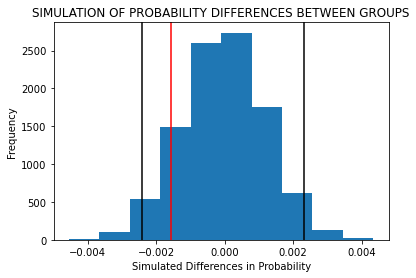

In [30]:
# Adding a 95% confidence interval to the histogram

lower, upper = np.percentile(p_diffs, 2.5), np.percentile(p_diffs, 97.5)

# Plotting the histogram with observed difference and confidence interval

plt.title('SIMULATION OF PROBABILITY DIFFERENCES BETWEEN GROUPS');
plt.xlabel('Simulated Differences in Probability');
plt.ylabel('Frequency');
plt.axvline(lower, color='black');
plt.axvline(upper, color='black');
plt.axvline(obs_diff, color='red');
plt.hist(p_diffs);

j. What proportion of the **p_diffs** are greater than the actual difference observed in **ab_data.csv**?

In [31]:
# Getting the proportion of differences in our list that is greater than the actual observed difference "obs_diff"

p_val = (p_diffs > obs_diff).mean()
p_val

0.9002

k. In words, explain what you just computed in part **j.**  What is this value called in scientific studies?  What does this value mean in terms of whether or not there is a difference between the new and old pages?

**In part j, we calculated the $p$-value, it is the probability of observing a statistic (or one more extreme in favor of the alternative) if the null hypothesis is true.**

**Given that the $p$-value is 0.9042 which is greater that our Type I error rate of 0.05, we fail to reject the null hypothesis. Basically, the p-value is a measure of probability that an observed difference could have occurred just by random chance.**

l. We could also use a built-in to achieve similar results.  Though using the built-in might be easier to code, the above portions are a walkthrough of the ideas that are critical to correctly thinking about statistical significance. Fill in the below to calculate the number of conversions for each page, as well as the number of individuals who received each page. Let `n_old` and `n_new` refer the the number of rows associated with the old page and new pages, respectively.

In [32]:
# Importing statsmodels package and creating variables with conversion in each group along with number of
# users in each group

import statsmodels.api as sm

convert_old = df2.query("landing_page == 'old_page' & converted == 1").shape[0]
convert_new = df2.query("landing_page == 'new_page' & converted == 1").shape[0]
n_old = df2.query("landing_page == 'old_page'").shape[0]
n_new = df2.query("landing_page == 'new_page'").shape[0]

m. Now use `stats.proportions_ztest` to compute your test statistic and p-value.  [Here](http://knowledgetack.com/python/statsmodels/proportions_ztest/) is a helpful link on using the built in.

In [33]:
## Getting the z-score & p-value for comparison with our previous results

z_score, p_value = sm.stats.proportions_ztest([convert_new,convert_old], [n_new,n_old], alternative='larger')
z_score, p_value

(-1.3109241984234394, 0.9050583127590245)

n. What do the z-score and p-value you computed in the previous question mean for the conversion rates of the old and new pages?  Do they agree with the findings in parts **j.** and **k.**?

**The z-score is the number of standard deviations the observation is from the mean. It is negative here, which means that the observation is below the mean with this many standard deviations. The $p$-value is the same as the one we calculated earlier as well.**

**Consequently, we fail to reject the null hypothesis, again.**

<a id='regression'></a>
### Part III - A regression approach

`1.` In this final part, you will see that the result you acheived in the previous A/B test can also be acheived by performing regression.<br><br>

a. Since each row is either a conversion or no conversion, what type of regression should you be performing in this case?


**Since the dependent variable is binary, 0's & 1's, we should perform logistic regression.**

b. The goal is to use **statsmodels** to fit the regression model you specified in part **a.** to see if there is a significant difference in conversion based on which page a customer receives.  However, you first need to create a column for the intercept, and create a dummy variable column for which page each user received.  Add an **intercept** column, as well as an **ab_page** column, which is 1 when an individual receives the **treatment** and 0 if **control**.

In [34]:
# Viewing the first few lines of our dataset for reference

df2.head()

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1


In [35]:
# Adding intercept

df2['intercept'] = 1

# Creating a dummy from the group column

df2['ab_page'] = pd.get_dummies(df2['group'])['treatment']

# Checking the changes

df2.head()

,user_id,timestamp,group,landing_page,converted,intercept,ab_page
0,851104,2017-01-21 22:11:48.556739,control,old_page,0,1,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0,1,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,1,1
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0,1,1
4,864975,2017-01-21 01:52:26.210827,control,old_page,1,1,0


c. Use **statsmodels** to import your regression model.  Instantiate the model, and fit the model using the two columns you created in part **b.** to predict whether or not an individual converts.

In [36]:
# Instanciating the model, then fitting it

logit_mod = sm.Logit(df2['converted'], df2[['intercept', 'ab_page']])
results = logit_mod.fit()

Optimization terminated successfully.
         Current function value: 0.366118
         Iterations 6


d. Provide the summary of your model below, and use it as necessary to answer the following questions.

In [37]:
# Reviewing the results of the model's analysis

results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290582
Method:                           MLE   Df Model:                            1
Date:                Sun, 14 Nov 2021   Pseudo R-squ.:               8.077e-06
Time:                        21:24:43   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
Covariance Type:            nonrobust   LLR p-value:                    0.1899
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -1.9888      0.008   -246.669      0.000      -2.005      -1.973
ab_page       -0.0150      0.011     -1.311      0.190      -0.037       0.007
==============================================================================
"""

e. What is the p-value associated with **ab_page**? Why does it differ from the value you found in **Part II**?<br><br>  **Hint**: What are the null and alternative hypotheses associated with your regression model, and how do they compare to the null and alternative hypotheses in the **Part II**?

**The $p$-value associated with `ab_page` here is 0.19, which is still greater than our $\alpha$ of 0.05. Therefore, we fail to reject the null hypothesis for the thrid time.**

**The regression test is two-sided, while in `Part II` we performed a one-sided test. That is why the $p$-value is different between the two.**

**Our hypotheses changed as well, in `Part II` they were:
$$H_{0}: p_{old} \ge p_{new}\\
H_{1}: p_{old} < p_{new}$$**

**while here they are:**
$$H_0: p_{old} = p_{new}\\
H_1: p_{old} \neq p_{new}$$

f. Now, you are considering other things that might influence whether or not an individual converts.  Discuss why it is a good idea to consider other factors to add into your regression model.  Are there any disadvantages to adding additional terms into your regression model?

**It can be beneficial to add other factors to our model to avoid falling into `omitted-variable bias`, which is a type of selection bias that occurs in regression analysis when the right controls are not included. These controls (factors) might be the time users logged in, whether the login day was a work day or a weekend, the socioeconomic composition of test groups. One, some, or all of these might provide a clearer picture than just what's available in our model right now.**

**However, with many controls (explanatory variables) in our model, we need to be aware of multicollinearity and look if there are any correlations between the controls. We may also need to take a look at variance inflation factors (VIFs).**

**Logistic regression is inherently linear, so if the relationship between our dependant variable and any of the independent variables is not linear, our predictions might not be accurate.**

g. Now along with testing if the conversion rate changes for different pages, also add an effect based on which country a user lives. You will need to read in the **countries.csv** dataset and merge together your datasets on the approporiate rows.  [Here](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.join.html) are the docs for joining tables. 

Does it appear that country had an impact on conversion?  Don't forget to create dummy variables for these country columns - **Hint: You will need two columns for the three dummy variables.** Provide the statistical output as well as a written response to answer this question.

In [38]:
# Reading the countries from file, then joining it with our original DataFrame to create a new DataFrame

countries_df = pd.read_csv('./countries.csv')
df_new = countries_df.set_index('user_id').join(df2.set_index('user_id'), how='inner')

In [39]:
# Reviewing the first few lines of our new DataFrame

df_new.head()

,country,timestamp,group,landing_page,converted,intercept,ab_page
user_id,,,,,,,
834778,UK,2017-01-14 23:08:43.304998,control,old_page,0,1,0
928468,US,2017-01-23 14:44:16.387854,treatment,new_page,0,1,1
822059,UK,2017-01-16 14:04:14.719771,treatment,new_page,1,1,1
711597,UK,2017-01-22 03:14:24.763511,control,old_page,0,1,0
710616,UK,2017-01-16 13:14:44.000513,treatment,new_page,0,1,1


In [40]:
# Showing country information for reference

df_new.country.value_counts(['country'])

US    0.700723
UK    0.249381
CA    0.049896
Name: country, dtype: float64

In [41]:
### Create the necessary dummy variables

df_new[['CA', 'UK', 'US']] = pd.get_dummies(df_new['country'])

In [42]:
# Fitting the linear model and obtaining results with CA as our base

logit_mod = sm.Logit(df_new['converted'], df_new[['intercept', 'ab_page', 'US', 'UK']])
results = logit_mod.fit()
results.summary()

Optimization terminated successfully.
         Current function value: 0.366113
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290580
Method:                           MLE   Df Model:                            3
Date:                Sun, 14 Nov 2021   Pseudo R-squ.:               2.323e-05
Time:                        21:24:44   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
Covariance Type:            nonrobust   LLR p-value:                    0.1760
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -2.0300      0.027    -76.249      0.000      -2.082      -1.978
ab_page       -0.0149      0.011     -1.307      0.191      -0.037       0.007
US             0.0408      0.027      1.516      0.130      -0.012       0.093
UK             0.0506      0.028      1.784      0.074      -0.005       0.106
==============================================================================
"""

**The probabilities provided by our model does not appear to have statistical significance, even after adding the country to our independent variables. We fail to reject the null hypothesis for the fourth time.**

h. Though you have now looked at the individual factors of country and page on conversion, we would now like to look at an interaction between page and country to see if there significant effects on conversion.  Create the necessary additional columns, and fit the new model.  

Provide the summary results, and your conclusions based on the results.

In [43]:
# Adding interactive dummy variables between ab_page(group) & country

df_new['US_inter'] = df_new['US'] * df_new['ab_page']
df_new['UK_inter'] = df_new['UK'] * df_new['ab_page']

# Checking results of previous step

df_new.head()

,country,timestamp,group,landing_page,converted,intercept,ab_page,CA,UK,US,US_inter,UK_inter
user_id,,,,,,,,,,,,
834778,UK,2017-01-14 23:08:43.304998,control,old_page,0,1,0,0,1,0,0,0
928468,US,2017-01-23 14:44:16.387854,treatment,new_page,0,1,1,0,0,1,1,0
822059,UK,2017-01-16 14:04:14.719771,treatment,new_page,1,1,1,0,1,0,0,1
711597,UK,2017-01-22 03:14:24.763511,control,old_page,0,1,0,0,1,0,0,0
710616,UK,2017-01-16 13:14:44.000513,treatment,new_page,0,1,1,0,1,0,0,1


In [44]:
### Fit Your Linear Model And Obtain the Results

logit_mod = sm.Logit(df_new['converted'], df_new[['intercept', 'ab_page', 'US', 'UK', 'US_inter', 'UK_inter']])
results = logit_mod.fit()
results.summary()

Optimization terminated successfully.
         Current function value: 0.366109
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290578
Method:                           MLE   Df Model:                            5
Date:                Sun, 14 Nov 2021   Pseudo R-squ.:               3.482e-05
Time:                        21:24:45   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
Covariance Type:            nonrobust   LLR p-value:                    0.1920
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -2.0040      0.036    -55.008      0.000      -2.075      -1.933
ab_page       -0.0674      0.052     -1.297      0.195      -0.169       0.034
US             0.0175      0.038      0.465      0.642      -0.056       0.091
UK             0.0118      0.040      0.296      0.767      -0.066       0.090
US_inter       0.0469      0.054      0.872      0.383      -0.059       0.152
UK_inter       0.0783      0.057      1.378      0.168      -0.033       0.190
==============================================================================
"""

***The probabilities of the interactive dummy variables added above are not statistically significant as well since they are above our $\alpha$ of 0.05***

<a id='conclusions'></a>
## Conclusions

**Based on the available data and our test results, there is no evidence that suggests the new landing page will perform better than the old page.**

**There should be no reason to waste time and money to implement the new layout when there is no return from it.**


### External Resources

[Pandas crosstab](https://pandas.pydata.org/docs/reference/api/pandas.crosstab.html)  
[Z-test](https://web.archive.org/web/20190226200315/http://knowledgetack.com/python/statsmodels/proportions_ztest/)  
[Is logistic regression linear?](https://www.researchgate.net/post/Is-Logistic-regression-a-linear-method)  
[Selecting multiple rows and comlumn in Pandas](https://youtu.be/xvpNA7bC8cs)  
[Omitted variable bias](https://youtu.be/b4jhrK03zhs)  
[Advantages & disadvantages of logistic regression](https://www.geeksforgeeks.org/advantages-and-disadvantages-of-logistic-regression/)  
